In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Đường dẫn tới file CSV đã được trích xuất từ COCO2017
file_path = "f_coco_triplets.csv"

# Đọc dữ liệu
df = pd.read_csv(file_path)
df.columns = ['subject', 'predicate', 'object', 'image_id']  # Đảm bảo đặt tên cột đúng
df.head()

,subject,predicate,object,image_id
0,man,wear,hat,93437
1,telephone,have,banana,12667
2,group,drive,tree,314251
3,man,enjoy,nap,223747
4,man,wear,hat,93437


In [4]:
print("Tổng số dòng dữ liệu:", len(df))
print("Số ảnh duy nhất:", df['image_id'].nunique())
print("Số triplet duy nhất:", df.drop_duplicates(['subject', 'predicate', 'object']).shape[0])
print("Một số giá trị thiếu:")
print(df.isnull().sum())

Tổng số dòng dữ liệu: 3316
Số ảnh duy nhất: 2250
Số triplet duy nhất: 2613
Một số giá trị thiếu:
subject      1
predicate    0
object       0
image_id     0
dtype: int64


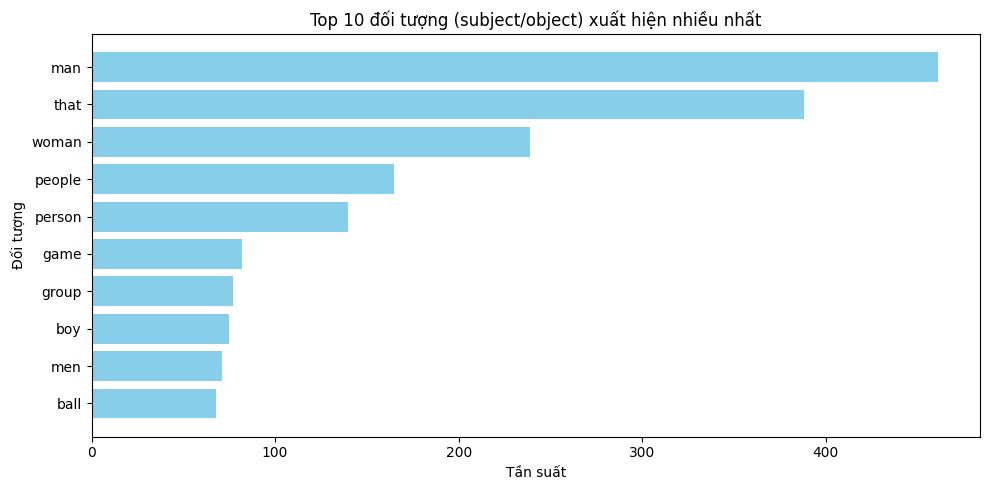

In [6]:
# Top 10 đối tượng (subject hoặc object) phổ biến nhất
object_freq = pd.concat([df['subject'], df['object']]).value_counts().head(10)

# Vẽ biểu đồ bằng matplotlib
plt.figure(figsize=(10, 5))
plt.barh(object_freq.index[::-1], object_freq.values[::-1], color='skyblue')  # Đảo ngược để item phổ biến nhất nằm trên
plt.title("Top 10 đối tượng (subject/object) xuất hiện nhiều nhất")
plt.xlabel("Tần suất")
plt.ylabel("Đối tượng")
plt.tight_layout()
plt.show()

In [7]:
# Hàm làm sạch chuỗi
def normalize_text(text):
    return str(text).strip().lower().replace("_", " ")

# Áp dụng cho 3 cột văn bản chính
df['subject'] = df['subject'].apply(normalize_text)
df['predicate'] = df['predicate'].apply(normalize_text)
df['object'] = df['object'].apply(normalize_text)

In [8]:
df.to_csv("triplets_preprocessed.csv", index=False)
print("Đã lưu dữ liệu đã tiền xử lý.")

Đã lưu dữ liệu đã tiền xử lý.
